### Блок практики

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 8)

import warnings
warnings.filterwarnings('ignore')

# k Nearest Neighbors (kNN)
Метод k ближайших соседей рассчитывает расстояния от нового объекта до всех объектов выборки и, отбирая k ближайших, предсказывает целевую переменную с помощью голосования (в случае классификации) или усреднения (в случае регрессии). \
При этом этот метод можно по-разному настраивать, например можно изменить способ подсчета расстояний или способ взвешивания соседей по расстоянию. \
Для начала скачаем датасет и визуализируем данные.

In [2]:
### Загрузим датасет

circ = pd.read_csv('concertriccir2.csv')
circ.head()


,X,Y,class
0,0.700335,-0.247068,0.0
1,-3.950019,2.740080,1.0
2,0.150222,-2.157638,1.0
3,-1.672050,-0.941519,1.0
4,2.560483,-1.846577,1.0


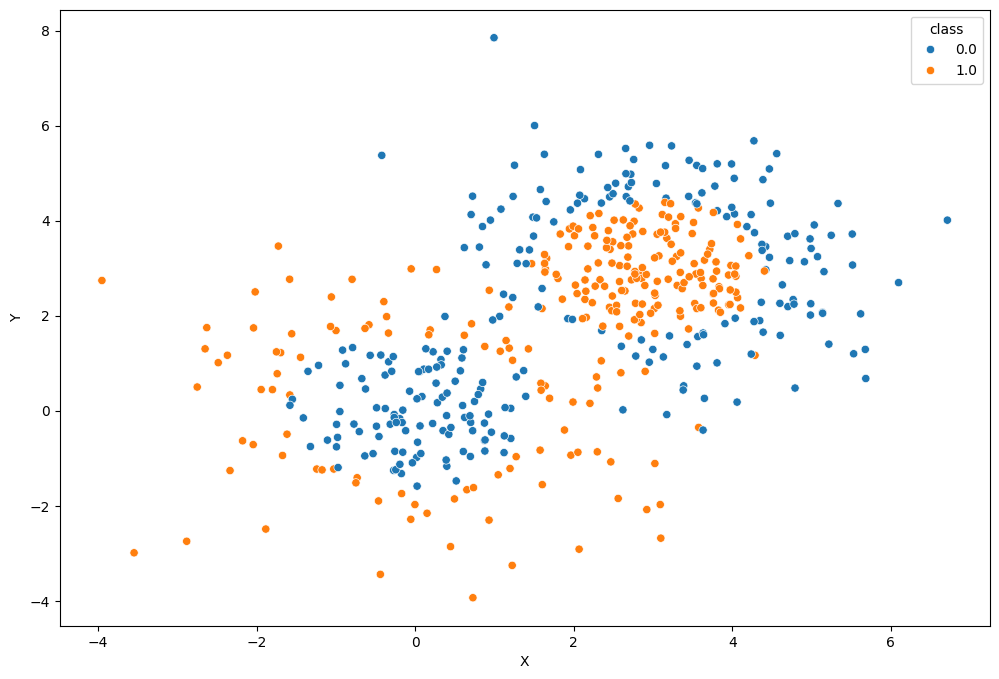

In [3]:
### Изобразим данные

sns.scatterplot(x=circ['X'], y=circ['Y'], hue=circ['class']);

**Задание 1.** Обучите логистическую регрессию на данных и нарисуйте разделяюущую гиперплоскость (прямую) на рисунке с данными. Как линейный классификатор справился с задачей? Сделайте вывод исходя из геометрии данных и линии разделения. Какой accuracy выйдет на всей выборке (без валидации) (2б)?

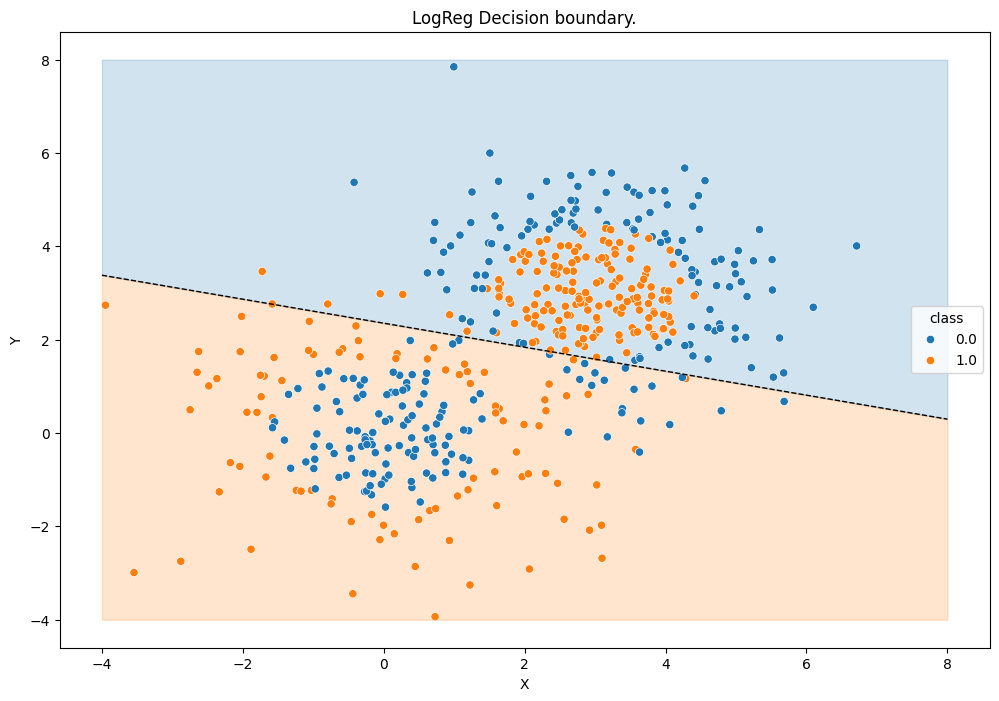

In [4]:
from sklearn.linear_model import LogisticRegression

# Подсказка: создайте модель LogisticRegression и обучите её на данных circ[['X', 'Y']] и circ['class'].
# Затем извлеките коэффициенты гиперплоскости (intercept и coef_) и нарисуйте её с помощью matplotlib.
# your code here
X = circ[['X','Y']]
Y = circ[['class']]

log_model = LogisticRegression()
log_model.fit(X,Y)
b = log_model.intercept_[0]

### Достанем веса возле каждый фичи из уравнения получившейся гиперплоскости
w1, w2 = log_model.coef_.T

c = -b/w2
m = -w1/w2

### Нагенерим точек для изображения этой прямой y = m * x + c
xd = np.array([-4, 8])
yd = m*xd + c
### Нанесем все на график с помощью pyplot
plt.plot(xd, yd, 'k', lw=1, ls='--')
plt.fill_between(xd, yd, 8, color='tab:blue', alpha=0.2)
plt.fill_between(xd, yd, -4, color='tab:orange', alpha=0.2)

plt.title('LogReg Decision boundary.')
sns.scatterplot(x=circ['X'],y= circ['Y'], hue=circ['class']);


In [5]:
# Подсказка: используйте метод score() для расчёта accuracy на всей выборке.
# your code here
log_model.score(X,Y)

0.422

**Задание 2.** Разделите обучающую выборку и обучите 6 моделей kNN с различным числом соседей из `all_k`, сохраните обученные классификаторы в список. \
Выведите accuracy на тренировочной и тестовой выборке для каждой модели. Каково оптимальное число соседей с точки зрения accuracy? (2б)

In [6]:
### Разделим выборку

X = circ[['X', 'Y']].values
y = circ['class'].values.astype('int')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

In [7]:
from sklearn.neighbors import KNeighborsClassifier
all_k = [1, 3, 10, 30, 40, 60]

# Подсказка: создайте цикл для обучения моделей KNeighborsClassifier для каждого значения k в all_k. 
# Сохраните обученные модели в список и рассчитайте accuracy для тренировочной и тестовой выборок.
# your code here
model = []
acc_train = []
acc_test = []
for k in all_k:
    knn = KNeighborsClassifier(k)
    knn.fit(X_train,y_train)
    model.append(knn)
    acc_train.append(np.mean(knn.predict(X_train) == y_train))
    acc_test.append(np.mean(knn.predict(X_test) == y_test))


pd.DataFrame({'k' : all_k,
              'ACC Train' : acc_train,
              'ACC Test' : acc_test})


,k,ACC Train,ACC Test
0,1,1.0000,0.89
1,3,0.9475,0.87
2,10,0.9150,0.85
3,30,0.8525,0.74
4,40,0.7975,0.75
5,60,0.6925,0.73


**Задание 3.** (БОНУС! БЕЗ БАЛЛОВ И ЧЕКЕРОВ!) Скачайте библиотеку [mlxtend](http://rasbt.github.io/mlxtend/#examples) для визуализации решающих поверхностей. \
В документации можно ознакомиться с [примерами](http://rasbt.github.io/mlxtend/user_guide/plotting/plot_decision_regions/) изображения решающих поверхностей для различных моделей. \
Построим несколько таких графиков для шести обученных нами kNN.

1. Подберите параметры `gridspec.GridSpec()` и `itertools.product()` для нашего числа классификаторов. 
2. Удобно перед визуализацией сохранить обученные классификаторы в список `all_clfs`.
3. Проявите терпение! Отрисовка решающих поверхностей может занимать пару минут.

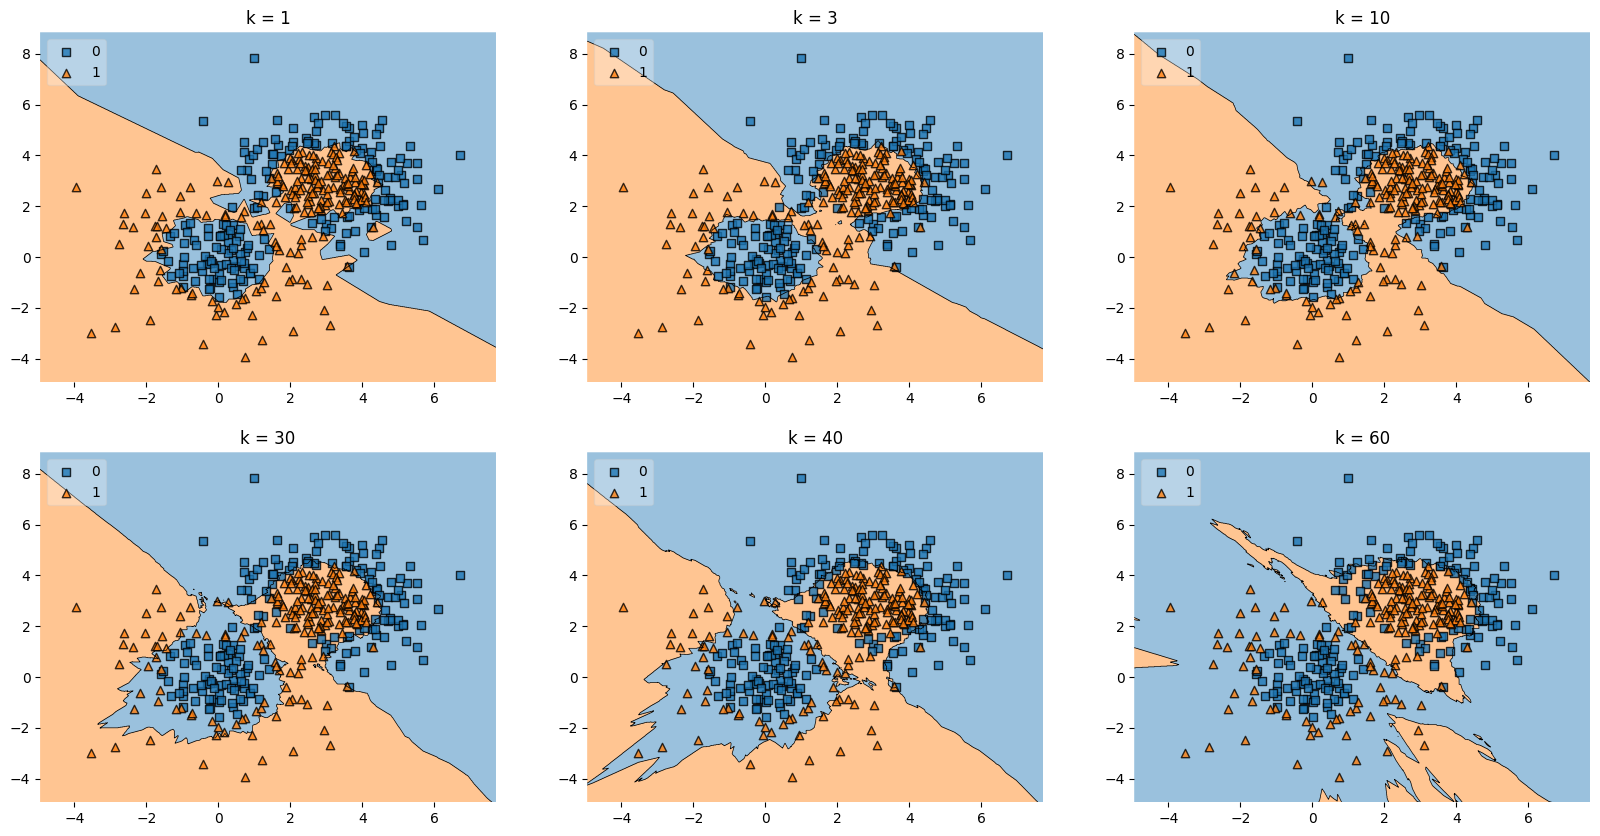

In [8]:
import mlxtend
from mlxtend.plotting import plot_decision_regions
import matplotlib.gridspec as gridspec
import itertools


gs = gridspec.GridSpec(2, 3)
fig = plt.figure(figsize=(20,10))

labels = ['k = 1', 'k = 3', 'k = 10', 'k = 30', 'k = 40', 'k = 60']
for clf, lab, grd in zip(model,
                         labels,
                         itertools.product([0, 1], [0, 1, 2])):
    ax = plt.subplot(gs[grd])
    fig = plot_decision_regions(X_train, y_train, clf=clf, legend=2)
    plt.title(lab)
plt.show()

**Задание 4.** Скачайте уже известный вам датасет [SigmaCabs](https://www.kaggle.com/datasets/arashnic/taxi-pricing-with-mobility-analytics). Обучите классификатор kNN на отнормированных и не отнормированных данных, подобрав лучшие гиперпараметры среди $k \in [1, 5, 10]$. Замерьте качество на тестовой выборке. \
Почему нормирование данных помогает улучшить качество?

In [9]:
df = pd.read_csv('sigma_cabs.csv')
df.head()
df = df.set_index('Trip_ID')
X = df.drop(columns='Surge_Pricing_Type')
y = df['Surge_Pricing_Type']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)

# Подсказка: обучите KNeighborsClassifier на оригинальных данных и выведите accuracy для test выборки.
# your code here
k_list = [1,5,10]
acc_test = []
for k in k_list:
    clf = KNeighborsClassifier(n_neighbors=k).fit(X_train,y_train)
    acc_test.append(clf.score(X_test,y_test))

pd.DataFrame({'k' : k_list,
              'ACC Test' : acc_test})

,k,ACC Test
0,1,0.438195
1,5,0.443170
2,10,0.470360


In [10]:
# Подсказка: используйте StandardScaler для нормализации данных, затем повторите процесс обучения kNN.
# your code here

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.transform(X_test)


all_k = [1, 5, 10]
acc_test = []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k).fit(Xsc_train, y_train)
    acc_test.append(np.mean(clf.predict(Xsc_test) == y_test))
    
pd.DataFrame({'k' : all_k,
              'ACC Test' : acc_test})

,k,ACC Test
0,1,0.564881
1,5,0.630388
2,10,0.660768


**Задание 5.** Обучите классификатор kNN на отнормированных данных с помощью метрики Минковского. \
Значение параметра `p` возьмите равным единице. Замерьте качество на тестовой выборке и сравните с предыдущим заданием, где `p = 2`. (2б)

In [11]:
# Подсказка: настройте параметр metric='minkowski' и p=1 при создании KNeighborsClassifier.
# your code here
all_k = [1, 5, 10]
acc_test = []

for k in all_k:
    clf = KNeighborsClassifier(n_neighbors=k,p=1,metric='minkowski').fit(Xsc_train, y_train)
    acc_test.append(np.mean(clf.predict(Xsc_test) == y_test))
    
pd.DataFrame({'k' : all_k,
              'ACC Test' : acc_test})

,k,ACC Test
0,1,0.564311
1,5,0.627046
2,10,0.661148


**Задание 6.** Скачайте датасет [California Housing Prices](https://www.kaggle.com/datasets/camnugent/california-housing-prices), в котором мы будем предсказывать среднюю стоимость жилья. В качестве признаков будем использовать `['longitude', 'latitude']`, посмотрите на них с помощью scatterplot. \
По какой характеристике наш kNN регрессор в этом случае подбирает соседей?

1. Обучите обыкновенную линейную регрессию и замерьте RMSE на тренировочной и тестовой выборках.
2. Обучите kNN регрессор на отнормированных данных, подобрав лучшие гиперпараметры. 
3. Обучите kNN регрессор с гауссовским ядром, подобрав оптимальное значение ширины окна среди предложенных $h \in np.arange(0.02, 0.1, 0.01)$.

Как ширина окна влияет на веса при усреднении ответа по соседям? 

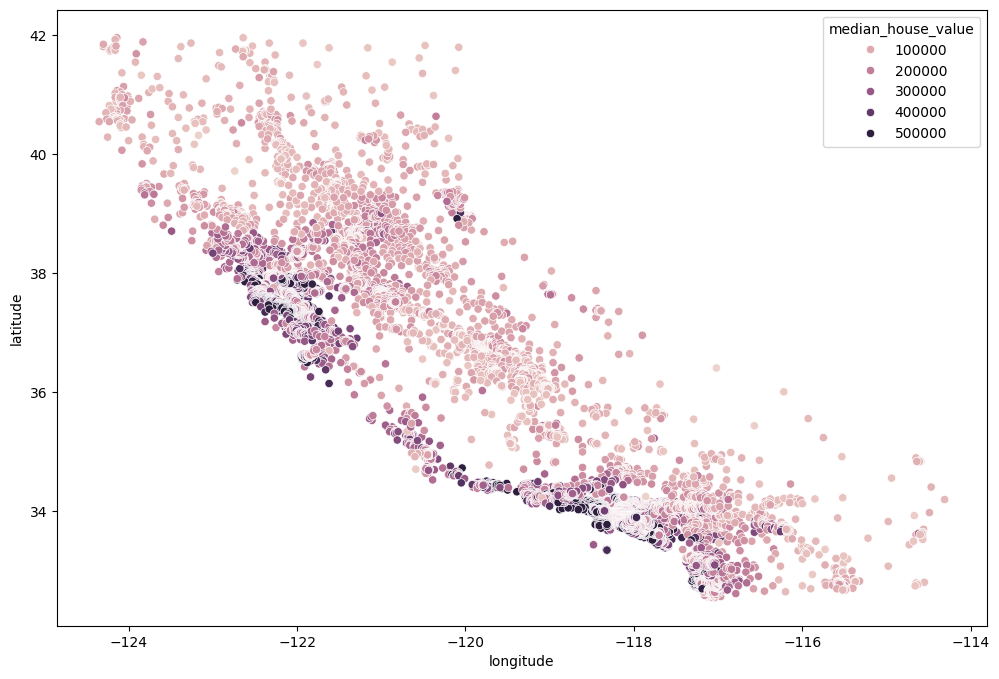

In [12]:
### Загрузим данные и разобьем выборку

df = pd.read_csv('housing.csv')
df.head()

X = df[['longitude', 'latitude']]
y = df['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    shuffle=True, random_state=2022)
sns.scatterplot(x='longitude', y='latitude', data=X, hue=y);

In [16]:
# Подсказка: нормализуйте данные, используя StandardScaler, затем обучите линейную регрессию и kNN регрессор.
# your code here
from sklearn.linear_model import LinearRegression
Xsc_train = scaler.fit_transform(X_train)
Xsc_test = scaler.fit_transform(X_test)
linreg = LinearRegression()
linreg.fit(Xsc_train,y_train)
linreg.score(Xsc_test,y_test)

0.25131111286719243

In [21]:
from sklearn.neighbors import KNeighborsRegressor

from sklearn.model_selection import GridSearchCV

param_grid = {
'n_neighbors':[x+1 for x in range(50)],
'p':np.linspace(0,3,30),
'weights' : ['uniform','distance']
}

knn = KNeighborsRegressor()
grid = GridSearchCV(knn,param_grid)
grid.fit(Xsc_train,y_train)
print(grid.best_estimator_,grid.best_params_,grid.best_score_)
grid.score(Xsc_test,y_test)

KNeighborsRegressor(n_neighbors=6, p=np.float64(2.0689655172413794)) {'n_neighbors': 6, 'p': np.float64(2.0689655172413794), 'weights': 'uniform'} 0.7844633349773549


0.5190429763612491

In [23]:
from functools import partial


def gaussian_kernel(distances, bandwidth):
    return np.exp(-0.5 * (distances / bandwidth) ** 2)


param_grid = {
    'n_neighbors':[x+1 for x in range(50)],
    'p':np.linspace(0,3,30),  
    'weights': [partial(gaussian_kernel, bandwidth=h) for h in np.arange(0.02, 0.1, 0.01)]
}


grid = GridSearchCV(KNeighborsRegressor(), param_grid, cv=5, scoring='r2')  
grid.fit(Xsc_train, y_train)  


print("Лучшие параметры:", grid.best_params_)
print("Лучшая оценка (R^2):", grid.best_score_)


test_score = grid.best_estimator_.score(Xsc_test, y_test)  
print(f"Оценка на тестовых данных (R^2): {test_score}")


Лучшие параметры: {'n_neighbors': 6, 'p': np.float64(1.9655172413793103), 'weights': functools.partial(<function gaussian_kernel at 0x7c8e34b63a60>, bandwidth=np.float64(0.02))}
Лучшая оценка (R^2): 0.787057522803683
Оценка на тестовых данных (R^2): 0.5122329275759796


np.float64(0.787057522803683)